# Machine Learning Lab I - Supervised Learning

<br>

<center>Workshop by Dr Richard Diamond </center>

<center> London, 16 April 2020 </center>
<br>

<br>
<center> <h3>Selected Python Code</h3> </center>

**This file contains selected code for Classifier fitting and useful graphical illustrations from ML Lab I. Experimental dev and repetitive code was removed.** 

------


# Resources


scikit-learn [User Guide](http://scikit-learn.org/stable/user_guide.html) is your first point of call
---------

* Generalised Linear Models
http://scikit-learn.org/stable/modules/linear_model.html

* Support Vector Machines 
http://scikit-learn.org/stable/modules/svm.html

* Ensemble Methods
http://scikit-learn.org/stable/modules/ensemble.html#adaboost


also recommended from online resources
---------

* [Quick walk-through](https://www.kdnuggets.com/2018/02/tour-top-10-algorithms-machine-learning-newbies.html) with simplifying plots: Logistic Regression, LDA, Decision Trees, Naive Bayes, K-Nearest Neighbors, LVQ, SVM, Bagging and Random Forest, Boosting and AdaBoost -- those are our **keywords**.
<br><br>

* **Explore** the code and vignetters from [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)** plus Youtube videos from the author, Jake VanderPlas. _Online Textbook_
<br><br> 

* Certain articles from towardsdatascience.com on [Logistic Regression](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8), also [Crossvalidation](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6). 
<br><br> 


paper textbooks
---------

*  _Machine Learning: An Applied Mathematics Introduction_, our introduction from Paul Wilmott, 2019. 

Look into the maths of various kinds of 'distances' between observations. Also understand why quite a few ML techniques (KNN, Decision Trees) might not represent any 'learning'.

<br><br>


* _Big Data and Machine Learning in Quantitative Investment_ by Tony Guida. A collection of chapters -- each shows different application in finance, to the varied degree of clarity (no code). 
<br><br> 


* _An Introduction to Statistical Learning with Applications in R_ by James/Witten/Hastie/Tibshirani [book website](http://faculty.marshall.usc.edu/gareth-james/ISL/) and [pdf](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf) available from the authors.
<br><br> 



Slidepacks from Data Science and Machine Learning I, II modules lectures, labs and remember you will have access to Electives, which will also have ML content.    I think you should not overlook our own Python notebooks that will come with ML Lab.


In [ ]:
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#import pandas_datareader as pdr
#from pandas_datareader import data 

In [2]:
xl = pd.ExcelFile('data/Corporate_PD.xlsm') 
xl.sheet_names

['Summary', 'Logit', 'Inference', 'Restricted Model', 'Probit']

In [3]:
AltmanScores_names = [['WC/TA', 'Working Capital/TA'], ['RE/TA', 'Retained Earnings/TA'], ['EBIT/TA', 'EBIT/TA'], ['ME/TL', 'Market Cap/Total Liabilities'], ['S/TA', 'Sales/TA'], ]
#also ['Const','Intercept'] # scores_altman[0][0]

# usecols stopped working after pandas 0.20.0
# this has been fixed but NOT IN pandas 0.23.0 install
# https://github.com/pandas-dev/pandas/issues/18273
# https://github.com/jacksonjos/pandas/commit/e25710065c8b9291a35289bf3ef97cc62bf966cf

#Y_Response = pd.read_excel(xl, sheet_name="Logit", header=0, usecols=['Default'])
#X_Features = pd.read_excel(xl, sheet_name="Logit", header=0, usecols=['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA'])
#['Const', WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']

X_Features = pd.read_excel(xl, sheet_name="Logit", usecols=[4,5,6,7,8])
X_Features.head()

,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,0.500799,0.306846,0.043373,0.956271,0.334774
1,0.547780,0.322214,0.051843,1.064545,0.334591
2,0.451001,0.225150,0.026813,0.804096,0.245585
3,0.306887,0.191936,0.030058,0.387010,0.253438
4,0.447246,0.217368,0.032458,0.791639,0.275531


In [ ]:
X_Features.info() #len(X_Features)

In [5]:
Y_Response = pd.read_excel(xl, sheet_name='Logit', usecols=[2])
Y_Response.head()

,Default
0,0
1,0
2,0
3,0
4,0


In [6]:
Y_Response = Y_Response['Default'].ravel()
print(Y_Response)

[0 0 0 ... 1 1 1]


In [7]:
Y_Response_2D = np.reshape(Y_Response, (-1, 1)) # For the fussy OLS computation in sklearn IMPORTANT FEATURE
print(Y_Response_2D)

# Reshaping an array from 1D plain list (above) to 2D is IMPORTANT functionality. Similar to vec2mat() in Matlab
#x = np.reshape(x, (len(x),-1))

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


## Chapter. Logistic Refression as Classifier

### Default/survival classification (corporate PD)

--------

For our corporate defaults, **logistic regression** computed in Excel by explicit MLE (based on the log of logit function) has the following exact result:
<br><br>

\begin{equation*}
    \text{Default} = + 0.4146 \,\text{WC/TA} -1.454 \,\text{RE/TA} -8.00 \,\text{EBIT/TA} -1.5936 \,\text{ME/TL} + 0.6198 \,\text{S/TA}+\varepsilon_t
\end{equation*}
<br><br>

-------

In [8]:
from sklearn import linear_model

# sklearn Logistic Regression as the classifier.  Does not need explicit intercept.
logit = linear_model.LogisticRegression(C=1e5)
logit.fit(X_Features, Y_Response)  ###FITTING DONE HERE

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [12]:
print()
print('Logit beta coefficients for WC/TA, RE/TA, EBIT/TA, ME/TL, S/TA:')
print(logit.coef_)
print()
print('Intercept:')
print(logit.intercept_)
print()
print('model.classes_ =', logit.classes_)


Logit beta coefficients for WC/TA, RE/TA, EBIT/TA, ME/TL, S/TA:
[[ 0.41456713 -1.45401525 -8.00363047 -1.59359637  0.6198409 ]]

Intercept:
[-2.54337613]

model.classes_ = [0 1]


#### Sigmoid Plotting

The long routine below is coded just to produce a plot: data from each feature is plotted vs **{0,1}** value of Y (vertically).

The sigmoid function is plotted for the range of RE/TA values $-7, 5$. 

np.linspace(X_min, X_max, 3000) generates 3000 values in that range incrementally -- those are our input values (axe X).

In [30]:
def logistic_sigmoid(xb):
    return (1 / (1 + np.exp(-xb)))

In [31]:
#AltmanScores_names = [['WC/TA', 'Working Capital/TA'], ['RE/TA', 'Retained Earnings/TA'], ['EBIT/TA', 'EBIT/TA'], ['ME/TL', 'Market Cap/Total Liabilities'], ['S/TA', 'Sales/TA'], ]


#Procedure RELIES X_Features, Y_Response variables to be existing
def logistic_plot(X_min, X_max, FeatureName, FeatureBetaIdx):  
    
    plt.clf() #clears the figure drawing space, nothing to do with classifier!
    fig, ax = plt.subplots(figsize=(18,10))  #fig = plt.figure(figsize=(18,10))
        
    # 1. Plot two clusters of observations at Y={0,1} on a scatter
    ax.scatter(X_Features[FeatureName], Y_Response, c=Y_Response, zorder=20) #X_Features[FeatureName].ravel()
    
    # 2. Plot CALIBRATED sigmoid function (in orange) -- with the coeffient from Logistic Regression
    X_Sim = np.linspace(X_min, X_max, 3000) #Fill in 3,000 values for the range of axe X
    Y_Loss = logistic_sigmoid(X_Sim * logit.coef_[0,FeatureBetaIdx] + logit.intercept_) # Y_Loss = logistic_sigmoid(X_Sim * logit.coef_[0,FeatureBetaIdx] + logit.intercept_).ravel() 
    ax.plot(X_Sim, Y_Loss, color='red', linewidth=3)
    
    # 3. Below plots OLS line
    ols = linear_model.LinearRegression()
    ols.fit(X_Features, Y_Response_2D) ### Fitting done here. Fussy OLS computation requires np.reshape(Y_Response, (-1, 1))
    
    ax.plot(X_Sim, ols.coef_[0,FeatureBetaIdx] * X_Sim + ols.intercept_, linewidth=1) #we plot beta*x + intercept (omitting other betas)
    ax.axhline(.5, color='.5')
    
    plt.ylabel('Default Indicator 1 or 0', fontsize=22) # also ax.set_ylabel('Default Indicator')
    plt.xlabel('wrt Feature: ' + AltmanScores_names[FeatureBetaIdx][1], fontsize=22)
    plt.xticks(range(X_min, X_max), fontsize=14) #Axe X range
    plt.yticks([0, 1], fontsize=14)
    plt.ylim(-.25, 1.25)
    plt.xlim(X_min, X_max) #Axe X range
    plt.legend(('Logistic Regression', 'Linear Regression'),
           loc="lower right", fontsize=14)
    #plt.show()
    return ax

# plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
# Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. 
#type(fig) #<class 'matplotlib.figure.Figure'>
#type(ax) #<class 'matplotlib.axes._subplots.AxesSubplot'>

<Figure size 432x288 with 0 Axes>

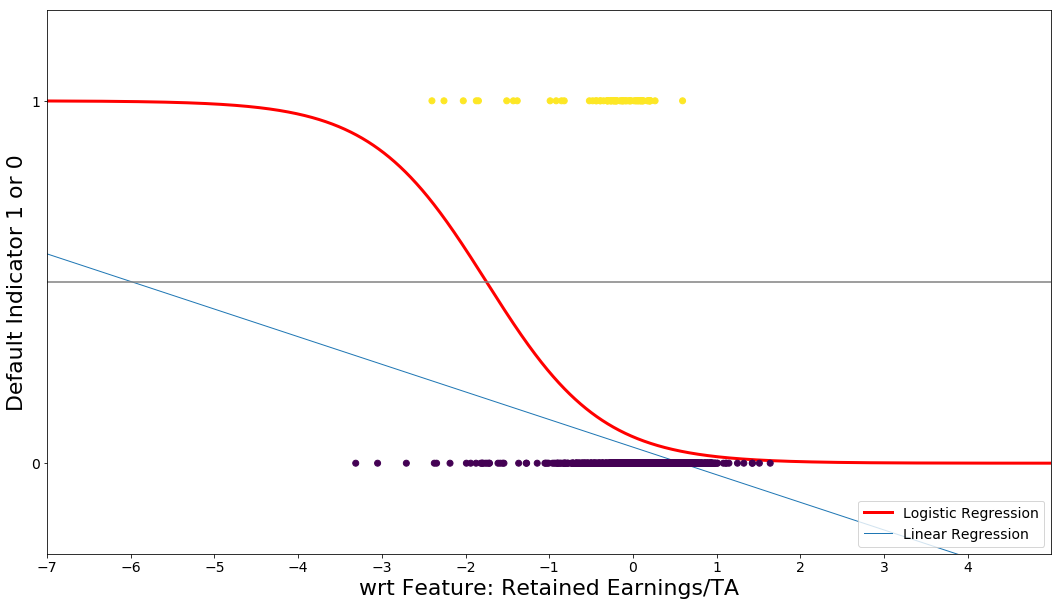

In [109]:
logistic_plot(-7, 5, 'RE/TA', 1)

#### Transition Probabilities

This functionality is present in EACH classifier, and here it predicts Probability Survival (first column) and Probability Default (second column). This is essentially our **transition matrix** by observation.


In [13]:
# Remember we fitted the Logistic Model (no need to specify an intercept additionaly)
#logit = linear_model.LogisticRegression(C=1e5)
#logit.fit(X_Features, Y_Response)

#clf.predict(X_Features)
logit.predict_proba(X_Features)

array([[0.98840442, 0.01159558],
       [0.99088592, 0.00911408],
       [0.98249419, 0.01750581],
       ...,
       [0.94488136, 0.05511864],
       [0.89797991, 0.10202009],
       [0.93257805, 0.06742195]])

## Naive Bayes

In [14]:
# http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
from sklearn.naive_bayes import BernoulliNB  #MultinomialNB

# Run Classification 
naivebayes = BernoulliNB()
naivebayes.fit(X_Features, Y_Response)  ###FITTING DONE HERE

naivebayes.get_params

<bound method BaseEstimator.get_params of BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)>

#### Transition Probabilities -  from Naive Bayes

In [15]:
naivebayes.predict_proba(X_Features)

array([[0.99521676, 0.00478324],
       [0.99521676, 0.00478324],
       [0.99521676, 0.00478324],
       ...,
       [0.92900717, 0.07099283],
       [0.39992414, 0.60007586],
       [0.92900717, 0.07099283]])


-----

## Chapter. Crossvalidation



In [18]:
from sklearn import model_selection

X_Train, X_Test, Y_Train, Y_Test = model_selection.train_test_split(X_Features, Y_Response, test_size=0.5, shuffle=True)
X_Train.head()

,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
1045,0.051460,0.086973,-0.016200,0.146642,0.035858
1062,0.039556,0.227646,0.023852,0.966149,0.129968
2904,0.106639,0.335551,0.033213,1.048021,0.263129
1505,0.178231,0.386647,0.073784,3.284487,0.278485
3043,0.098954,-0.044711,0.057134,0.172823,5.007775


In [19]:
X_Test.head()

,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
236,0.192771,1.324735,0.082150,2.317956,0.474640
1027,0.051443,-1.990381,0.036144,0.309103,0.261119
2060,0.012756,-0.195751,-0.094346,0.191014,0.070308
756,0.038207,0.609907,0.103554,5.224670,0.359692
3012,0.519814,0.243316,0.053013,0.295067,0.621532


In [20]:
logit2 = linear_model.LogisticRegression(C=1e5) #Re-estimate on Training Dataset
logit2.fit(X_Train, Y_Train)  ###FITTING DONE HERE

Y_Pred = logit2.predict(X_Test)

print('Coefficients: ')
print( logit2.coef_.ravel())

print('Population Coefficients: ')
print( logit.coef_.ravel())

Coefficients: 
[  1.01932466  -1.81584226 -15.44653837  -2.08189036   0.42428104]
Population Coefficients: 
[ 0.41456713 -1.45401525 -8.00363047 -1.59359637  0.6198409 ]


In [21]:
logit2.score(X_Test, Y_Test) #Classification accuracy for train/test dataset split

0.9825

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_Pred)) 

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1973
          1       0.21      0.11      0.15        27

avg / total       0.98      0.98      0.98      2000



In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_Test, Y_Pred)
print(confusion_matrix)

[[1962   11]
 [  24    3]]


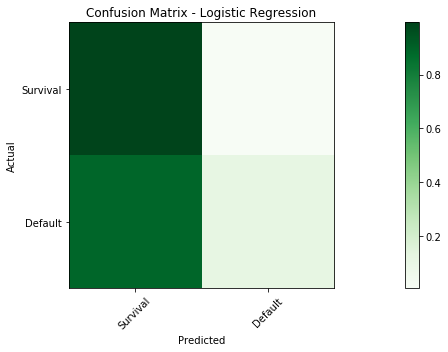

In [24]:
#  function for plotting confusion matrix
def plot_cm(cm, target_names, title,
            cmap=plt.cm.Greens):
    cm_norm = cm * 1. / cm.sum(axis=1)[:, np.newaxis]  # standardize the confusion matrix
    plt.imshow(cm_norm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    ticks = np.arange(len(target_names))
    plt.xticks(ticks, target_names, rotation=45)
    plt.yticks(ticks, target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.tight_layout()

    
plt.clf
plt.figure(figsize=(20, 5), facecolor='w')
plt.subplot(111)

plot_cm(confusion_matrix, ['Survival','Default'], 'Confusion Matrix - Logistic Regression')
plt.show()

#### Confusion Matrix (visualised above)

-------

#### Area under ROC Curve

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import StratifiedKFold

In [26]:
def plot_logistic_ROC(default_ind):

    default_ind_name = ['Positive (default)', 'Positive (survival)'] # This is in terms of label for Positives for Roc Curve
    
    logit_roc_aucT = roc_auc_score(Y_Test, logit2.predict(X_Test)) #Here, logit2 can run on Test or repeated on Train
    fprT, tprT, thresholdsT = roc_curve(Y_Test, logit2.predict_proba(X_Test)[:,1], pos_label=default_ind)

    logit_roc_aucP = roc_auc_score(Y_Response, logit.predict(X_Features))
    fprP, tprP, thresholdsP = roc_curve(Y_Response, logit.predict_proba(X_Features)[:,1], pos_label=default_ind)

    fig, ax = plt.subplots(figsize=(10,8))  #fig = plt.figure(figsize=(18,10))
    
    # 1) Plot a diagnoal line of fully random classifier
    ax.plot([0, 1], [0, 1],'r--', label='Random Classifier')
    
    # 1) Plot ROC Curve for the precictions on Test Dataset
    ax.plot(fprT, tprT, label='Train/Test Regression (area = %0.2f)' % logit_roc_aucT)
    
    # 1) Plot ROC Curve for the Full Dataset (Population)
    ax.plot(fprP, tprP, label='Population Regression (area = %0.2f)' % logit_roc_aucP)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False ' + default_ind_name[default_ind] + ' Rate', fontsize=20)
    plt.ylabel('True ' + default_ind_name[default_ind] + ' Rate', fontsize=20)
    plt.legend(loc="lower right", fontsize=14)
    plt.show()
    
    return ax

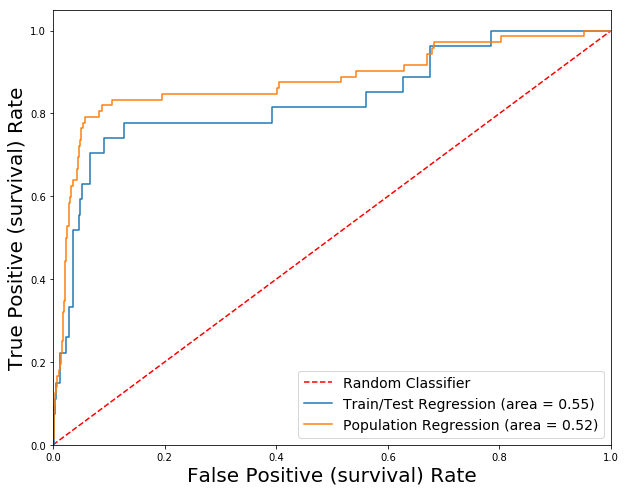

In [27]:
plot_logistic_ROC(1)


---

## Chapter 5. Imbalanced Samples

### Bagging Regressor


There exists Python packages to address [imbalanced samples](https://github.com/scikit-learn-contrib/imbalanced-learn). **HOWEVER** the situation of impalanced sample calls for Bagging Classifier pipeline (which is over Logit Classifier) and Ensemble Methods as an alternative classifier.
<br>

In [14]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [16]:
#We are going to use Logistic Classifier. Below were already executed so 'logit' variable exists
#logit = linear_model.LogisticRegression(C=1e5)
#logit.fit(X_Features, Y_Response)

bagging_reg_logit = BaggingRegressor(logit)
bagging_reg_logit.fit(X_Features, Y_Response)

In [19]:
bagging_pred_logit = bagging_reg_logit.predict(X_Features) #this is just an array with predictions
bagging_pred_logit

array([0. , 0. , 0. , ..., 0. , 0.1, 0. ])

In [33]:
print()
print('Returns the coefficient of determination R^2 of the prediction:')
print(bagging_reg_logit.score(X_Features, Y_Response, sample_weight=None))
print('NOTE. This is for exact prediction but we have likelihood.')


Returns the coefficient of determination R^2 of the prediction:
0.0007637474541747347
NOTE. This is for exact prediction but we have likelihood.


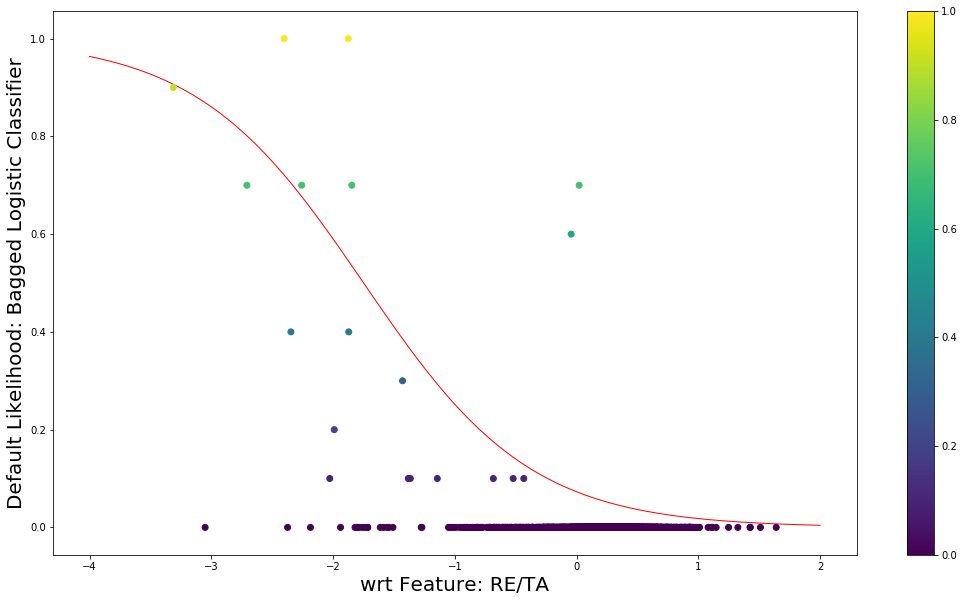

In [32]:
plt.figure(figsize=(18,10))
plt.scatter(X_Features['RE/TA'], bagging_pred_logit, c=bagging_pred_logit, zorder=20) #X_Features[FeatureName].ravel()
plt.colorbar()
plt.ylabel('Default Likelihood: Bagged Logistic Classifier', fontsize=20) # also ax.set_ylabel('Default Indicator')
plt.xlabel('wrt Feature: ' + 'RE/TA', fontsize=20)

X_Sim = np.linspace(-4, 2, 1500) #Fill in 3,000 values for the range of axe
Y_Loss = logistic_sigmoid(X_Sim * logit.coef_[0,1] + logit.intercept_) # Y_Loss = logistic_sigmoid(X_Sim * logit.coef_[0,FeatureBetaIdx] + logit.intercept_).ravel() 
plt.plot(X_Sim, Y_Loss, color='red', linewidth=1)
plt.show()


---

## Chapter. Support Vector Machines (clustering vs prediction) 


In [44]:
from sklearn.svm import SVC

In [45]:
# Run Support Vector Classification 
C=1e5
SVM_SVC = SVC(C=C, probability=True)
SVM_SVC.fit(X_Features, Y_Response) ###FITTING DONE HERE

SVM_SVC.get_params

<bound method BaseEstimator.get_params of SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

#### Transition Probabilities: now from Support Vector Classifier

In [46]:
SVM_SVC.predict_proba(X_Features)

array([[0.98361284, 0.01638716],
       [0.986435  , 0.013565  ],
       [0.98030567, 0.01969433],
       ...,
       [0.97486624, 0.02513376],
       [0.96682202, 0.03317798],
       [0.97406467, 0.02593533]])

-----

#### Support Vector illustration (limited to two features)

In [278]:
#Let's leave **TWO FEATURES** X_Features_2D -- essentially Restricted model M0 from Corporate PD.xls formulation.

X_Features_2D = X_Features.loc[:,['RE/TA', 'ME/TL']] 
Y_Response = pd.read_excel(xl, sheet_name='Logit', usecols=[2]) 
#we reload and Y_Response as DataFrame for plotting -- even if classifier 'doesn't like' it but its output the same

#type(Y_Response)

In [83]:
C=1e5 #To soften the margins try much smaller values, such as C=1
SVM_2D = SVC(C=C, probability=True) #kernel='linear'
SVM_2D.fit(X_Features_2D, Y_Response)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
# Plot the decision function for a 2D SVC
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xlim = (-3, 3) #Correction to see the entire decision boundary for SVM_2D based on X_Features.loc[:,['RE/TA', 'ME/TL']]
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

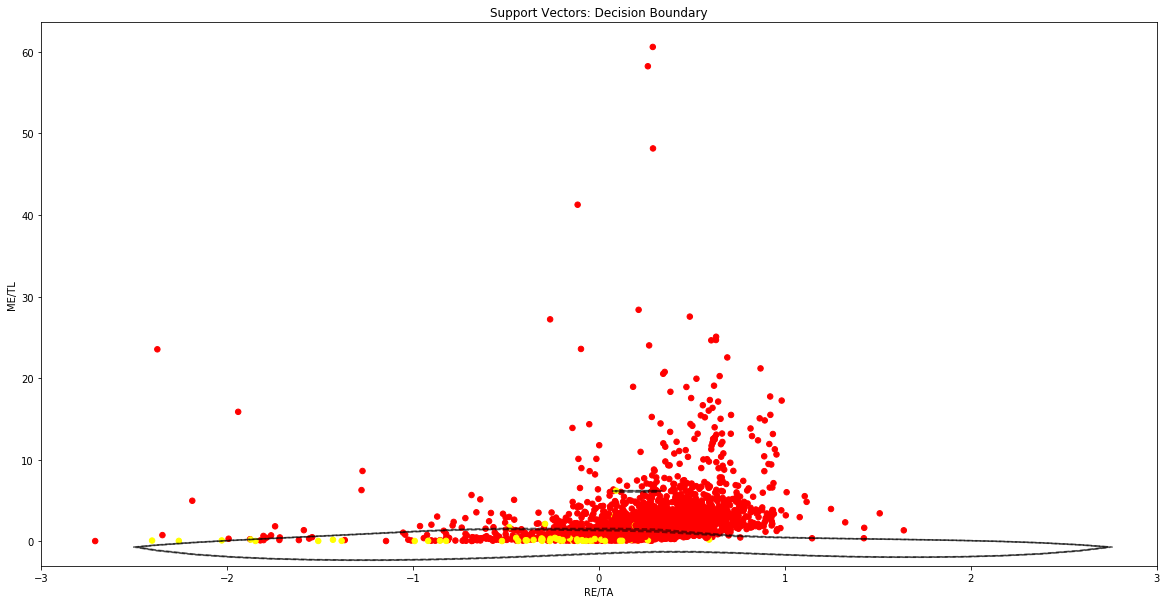

In [85]:
# Below only works with 2D features

plt.clf
plt.figure(figsize=(20, 10)) #facecolor='w'

plt.scatter(X_Features_2D.loc[:, 'RE/TA'], X_Features_2D.loc[:, 'ME/TL'], c=Y_Response.loc[:, 'Default'], s=30, cmap='autumn')
plot_svc_decision_function(SVM_2D);

#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('RE/TA')
plt.ylabel('ME/TL')
plt.title('Support Vectors: Decision Boundary')
#plt.legend(loc="lower right")
#plt.savefig('plot_name') #Save into file

plt.show()

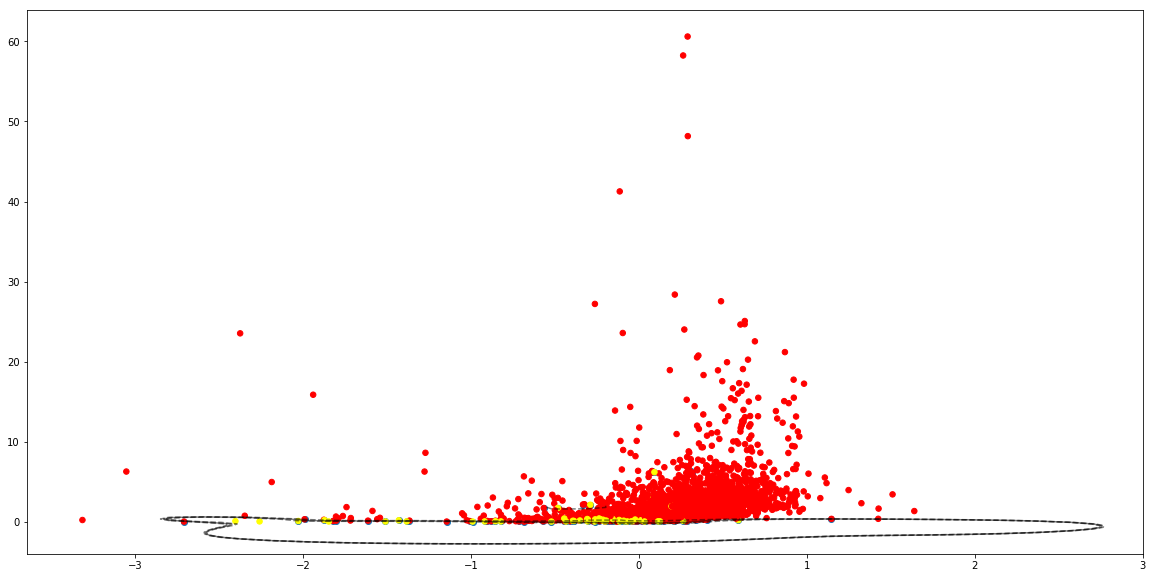

In [86]:
# Code below plots decision boundaries MANUALLY
# This is a prototype BEFORE plot_svc_decision_function() written

plt.clf
plt.figure(figsize=(20, 10)) #facecolor='w'

ax = plt.gca()

xlim = (-3, 3)
ylim = (-4, 2)

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = SVM_2D.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(SVM_2D.support_vectors_[:, 0], SVM_2D.support_vectors_[:, 1], s=50,
           linewidth=1, facecolors='none')

# plot support vectors
ax.scatter(SVM_2D.support_vectors_[:, 0], SVM_2D.support_vectors_[:, 1])

# plot features data
ax.scatter(X_Features_2D.loc[:, 'RE/TA'], X_Features_2D.loc[:, 'ME/TL'], c=Y_Response.loc[:, 'Default'], s=30, cmap='autumn')

plt.show()

-----


## Chapter. Random Forests and Ensemble Methods (AdaBoost)


In [180]:
# REPEAT of data loading -- for reference
#Two features -- essentially Restricted model M0 from Corporate PD.xls formulation.

X_Features_2D = X_Features.loc[:,['RE/TA', 'ME/TL']] 
Y_Response = pd.read_excel(xl, sheet_name='Logit', usecols=[2])
Y_Response = Y_Response['Default'].ravel()

In [181]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [222]:
rng = np.random.RandomState(1)

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X_Features_2D, Y_Response)
regr_2.fit(X_Features_2D, Y_Response)

# Predict
y_1 = regr_1.predict(X_Features_2D)
y_2 = regr_2.predict(X_Features_2D)


In [223]:
import graphviz
from sklearn.tree import export_graphviz 


In [226]:
# Visualising Decision Tree with graphviz

dot_data = export_graphviz(regr_1, out_file=None, 
                           feature_names= ['RE/TA', 'ME/TL'], 
                           class_names=['survival', 'default'], filled=True,
                           rounded=True,
                           proportion=True)

graph = graphviz.Source(dot_data, filename='../CODE_ML/TreeImageREG_graphviz', format='png'sdf)
graph.render();


### Decision Tree Visualised (Regressor)


In [228]:
clf = DecisionTreeClassifier(random_state=rng)
clf.fit(X_Features_2D, Y_Response)

# Predict
y_3 = clf.predict(X_Features_2D)

In [229]:
# Visualising Decision Tree with graphviz

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names= ['RE/TA', 'ME/TL'], 
                           class_names=['survival', 'default'], filled=True,
                           rounded=True,
                           proportion=True)

graph = graphviz.Source(dot_data, filename='../CODE_ML/TreeImageCLF_graphviz', format='png')
graph.render();

### Random Forests

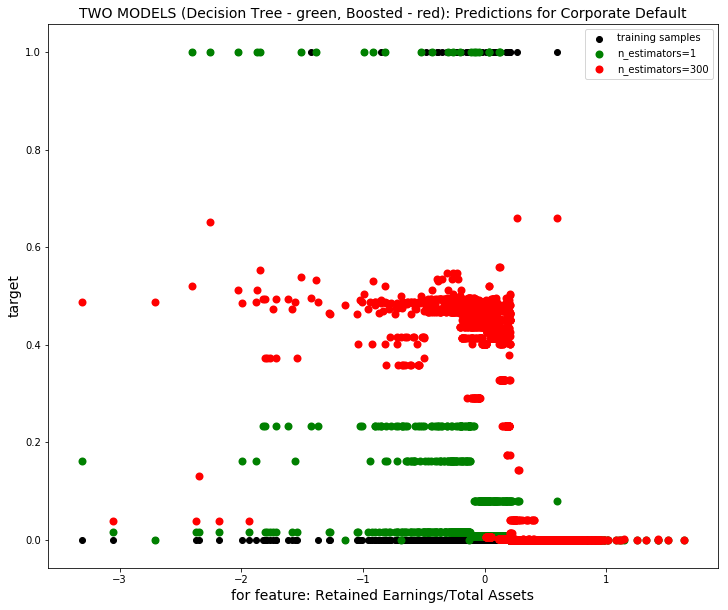

In [231]:
plt.clf
plt.figure(figsize=(12, 10))
plt.scatter(X_Features_2D['RE/TA'], Y_Response, c="k", label="training samples")

plt.scatter(X_Features_2D['RE/TA'], y_1, c="g", label="n_estimators=1", linewidth=2)
plt.scatter(X_Features_2D['RE/TA'], y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("for feature: Retained Earnings/Total Assets", fontsize=14)
plt.ylabel("target", fontsize=14)
plt.title("TWO MODELS (Decision Tree - green, Boosted - red): Predictions for Corporate Default", fontsize=14) #plt.colorbar() ADD ON NEXT RUN
plt.legend()
plt.show()

#xlabel= 'wrt Feature: ' + AltmanScores_names[FeatureBetaIdx][1]
#plt.xlabel(xlabel)

**NOTE** Two models are mixed on scratterplot such as these. In fact there are three datasets: ONE ACTUAL and TWO PREDICTED from our models: 

```python
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)
```


The scatterered output reveals plenty of search for our binary classification of default/non-default in Corporate PD dataset.
<br><br>

The nature of AdaBoost Classifier is to create copies of the trees (meaning copies of the dataset) and we see the search example produced by a random forest.

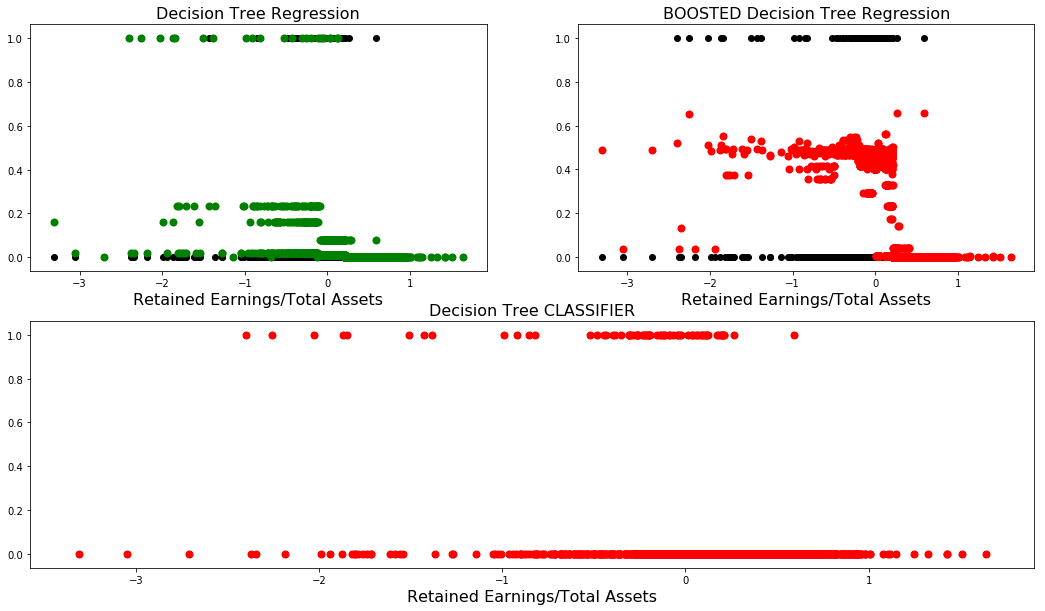

In [240]:
plt.clf #to clean canvass
fig = plt.figure(figsize=(18,10))

plt.subplot(221)
plt.scatter(X_Features_2D['RE/TA'], Y_Response, c="k", label="training samples(data)")
plt.scatter(X_Features_2D['RE/TA'], y_1, c="g", label="n_estimators=1", linewidth=2)
#plt.ylabel('Prediction target', fontsize=12) 
plt.xlabel('Retained Earnings/Total Assets', fontsize=14)
plt.title('Decision Tree Regression', fontsize=14)

plt.subplot(222)
plt.scatter(X_Features_2D['RE/TA'], Y_Response, c="k", label="training samples(data)")
plt.scatter(X_Features_2D['RE/TA'], y_2, c="r", label="n_estimators=300", linewidth=2)
#plt.ylabel('Prediction target', fontsize=12)
plt.xlabel('Retained Earnings/Total Assets', fontsize=14)
plt.title('BOOSTED Decision Tree Regression', fontsize=14)

plt.subplot(212)
plt.scatter(X_Features_2D['RE/TA'], Y_Response, c="k", label="training samples(data)")
plt.scatter(X_Features_2D['RE/TA'], y_3, c="r", label="n_estimators=300", linewidth=2)
#plt.ylabel('Prediction target', fontsize=12)
plt.xlabel('Retained Earnings/Total Assets', fontsize=14)
plt.title('Decision Tree CLASSIFIER', fontsize=14)


plt.show()

-----

## Radviz from Pandas 

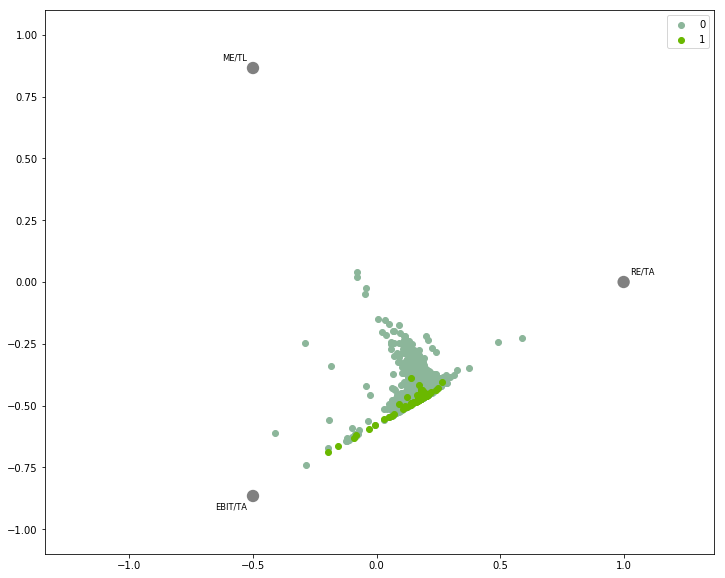

In [149]:
X_Features_2D = X_Features.loc[:,['RE/TA', 'ME/TL', 'EBIT/TA']] 
X_Features_2D['Default'] = Y_Response

from pandas.plotting import radviz

plt.clf
plt.figure(figsize=(12, 10))

radviz(X_Features_2D, 'Default')
plt.show()

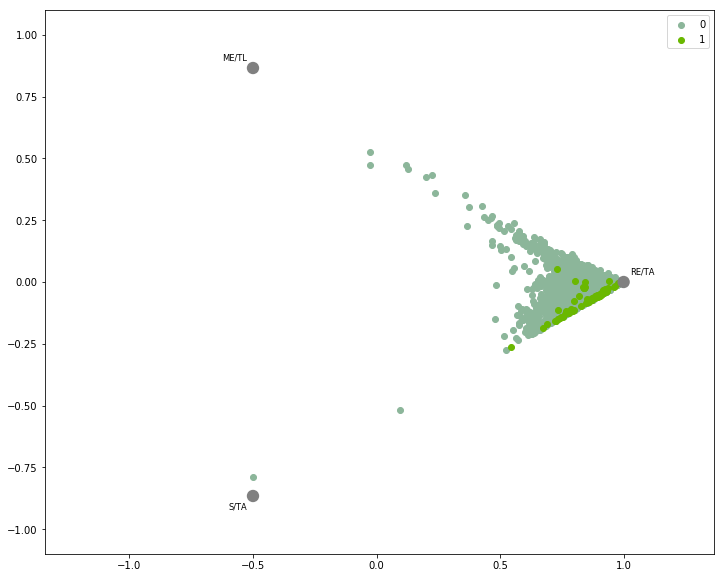

In [150]:
X_Features_2D = X_Features.loc[:,['RE/TA', 'ME/TL', 'S/TA']] 
X_Features_2D['Default'] = Y_Response

from pandas.plotting import radviz

plt.clf
plt.figure(figsize=(12, 10))

radviz(X_Features_2D, 'Default')
plt.show()

------

## K-Means Clustering

**Below** is an attempt at K-Means Clustering however plotting remains to be fixed. RD

Please also see an example in Classifier_Sandbox_IrisData.ipynb that shows KMeans clustering on the iris dataset.

In [1]:
from sklearn.cluster import KMeans

X_Features_KMeans = X_Features.loc[:,['RE/TA', 'ME/TL']] 
X_Features_KMeans['Default'] = Y_Response

#  1) KMeans clustering on the iris dataset
n_clusters = 2
k_means = KMeans(init='k-means++', n_clusters=n_clusters)
k_means.fit(X_Features_KMeans)  # fit the KMeans algo 
print (k_means.cluster_centers_) # get the cluster centers
print (k_means.labels_)  # cluster label for each data point
print (np.unique(k_means.labels_))

NameError: name 'X_Features' is not defined

In [ ]:
# TO FIX the reference inside X_Features_2D 
#  2) Need to fix plotting of K-mean nearest neighbours
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
featurex = 0  # The first 'feature' in iris.feature_names
featurey = 1  # The second 'feature' in iris.feature_names
for k in range(n_clusters):
    clust_members = k_means.labels_ == k
    x = X_Features_KMeans[clust_members, featurex] # CAUSES PROBLEMS
    y = X_Features_KMeans[clust_members, featurey] # CAUSES PROBLEMS
    ax.plot(x, y, 'o', c=plt.cm.spring(k*100), label=k, markersize=10)
    
ax.set_xlabel(X_Features_KMeans.feature_names[featurex])
ax.set_ylabel(X_Features_KMeans.feature_names[featurey])
#  bump the axis values ~+/- 5%
ax.set_xlim(np.min(X_Features_KMeans[:, featurex])*0.95, np.max(X_Features_2D[:, featurex])*1.05)
ax.set_ylim(np.min(X_Features_KMeans[:, featurey])*0.95, np.max(X_Features_2D[:, featurey])*1.05)
ax.legend()
plt.show()


------

### Common Sklearn Declarations for Classifiers and Crossvalidation in Python

The declarations give idea about the depths of functionality. It is important to know that in addition to models, there is **preprocessing** (such as scaling and standardisation) and **model selection/feature selection** by quantaitive metrics.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.cluster import KMeans

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,
from sklearn.ensemble import RandomForestRegressor,
from sklearn.ensemble import GradientBoostingRegressor,

from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error

from sklearn.preprocessing import Imputer

from sklearn.model_selection import GridSearchCV

from sklearn.calibration import calibration_curve

from sklearn import datasets


**END OF CODE FILE**